In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from scipy.optimize import fsolve
from scipy.linalg import *
from numpy import array
from scipy.cluster.vq import vq, kmeans, whiten
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
from sklearn import svm 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

/Users/chiselko6/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
def get_y(X):
    y = 3.0 * X**2 - 100.0 * X + 7.0
    return y + np.random.uniform(low=-300.0, high=300.0, size=X.shape[0])

In [4]:
X = np.linspace(1.0, 120.0, 100)
y = get_y(X)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [5]:
def show(X, y):
    plt.figure()
    plt.title('Pizza price plotted against diameter')
    plt.xlabel('Diameter in inches')
    plt.ylabel('Price in dollars')
    plt.plot(X, y, 'k.')
    plt.grid(True)
    plt.show()

In [6]:
def map_to_task(X, y):
    return map(lambda t: [t], X), map(lambda t: [t], y)

def map_to_arr(X, y):
    return map(lambda t: t[0], X), map(lambda t: t[0], y)

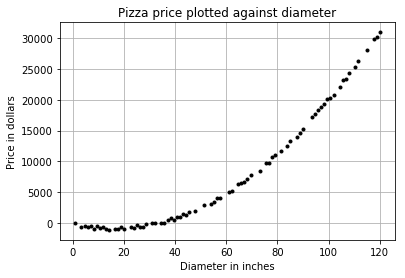

In [7]:
show(X_train, y_train)

In [8]:
model = LinearRegression()
X_train_, y_train_ = map_to_task(X_train, y_train)
model.fit(X_train_, y_train_)
X_test_, y_test_ = map_to_task(X_test, y_test)
predictions = model.predict(X_test_)

In [9]:
# map_to_arr(X_train_, predictions)

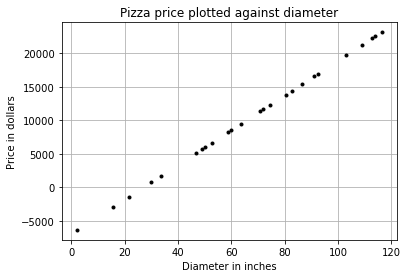

In [10]:
show(*map_to_arr(X_test_, predictions))

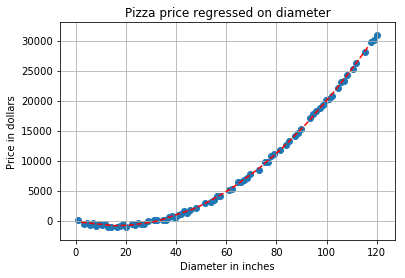

In [11]:
quadratic_featurizer = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_featurizer.fit_transform(X_train_)
X_test_quadratic = quadratic_featurizer.transform(X_test_)
X_test = np.array(sorted(X_test))
regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quadratic, y_train_)
xx_quadratic = quadratic_featurizer.transform(X_test.reshape(X_test.shape[0], 1))
plt.plot(X_test, regressor_quadratic.predict(xx_quadratic), c='r',linestyle='--')
plt.title('Pizza price regressed on diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.grid(True)
plt.scatter(X_train, y_train)
plt.show()

In [12]:
model.score(X_test_, y_test_)

0.87232308715211193

In [13]:
regressor_quadratic.score(X_test_quadratic, y_test_)

0.99961914979464406

In [ ]:
# STOP HERE

In [26]:
def get_y(X):
    return 3.0 * X**2 - 15.0 * X + 14.0

In [27]:
X = np.linspace(1.0, 120.0, 100)
y = get_y(X)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [28]:
def map_to_task(X, y):
    return map(lambda t: [t], X), map(lambda t: [t], y)

def map_to_arr(X, y):
    return map(lambda t: t[0], X), map(lambda t: t[0], y)

In [29]:
model = LinearRegression()
X_train_, y_train_ = map_to_task(X_train, y_train)
model.fit(X_train_, y_train_)
X_test_, y_test_ = map_to_task(X_test, y_test)
predictions = model.predict(X_test_)

In [30]:
print X_test_, predictions

[[63.505050505050505], [46.676767676767675], [70.717171717171709], [2.202020202020202], [75.525252525252526], [1.0], [107.97979797979798], [38.262626262626263], [105.57575757575758], [47.878787878787875], [94.757575757575751], [43.070707070707073], [59.898989898989896], [83.939393939393938], [14.222222222222221], [106.77777777777777], [40.666666666666664], [55.090909090909086], [103.17171717171716], [101.96969696969697], [79.131313131313135], [50.282828282828284], [67.111111111111114], [34.656565656565654], [91.151515151515156]] [[ 14970.76051788]
 [  9057.47165848]
 [ 17505.02717191]
 [ -6570.50604137]
 [ 19194.53827459]
 [ -6992.88381704]
 [ 30598.73821772]
 [  6100.82722878]
 [ 29753.98266638]
 [  9479.84943415]
 [ 25952.58268534]
 [  7790.33833146]
 [ 13703.62719087]
 [ 22151.18270429]
 [ -2346.72828465]
 [ 30176.36044205]
 [  6945.58278012]
 [ 12014.11608818]
 [ 28909.22711504]
 [ 28486.84933937]
 [ 20461.67160161]
 [ 10324.60498549]
 [ 16237.89384489]
 [  4833.69390176]
 [ 24685.

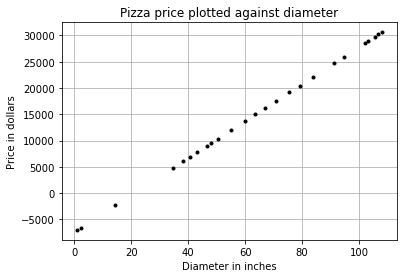

In [31]:
show(X_test, predictions)

In [63]:
def get_y(X):
    return 3.0 * X**2 - 15.0 * X + 14.0

def find_root(X):
    found = False
    y = get_y(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y)

    model = LinearRegression()
    X_train_, y_train_ = map_to_task(X_train, y_train)
    model.fit(X_train_, y_train_)
    
    def run(X_test, y_test):
        X_test_, y_test_ = map_to_task(X_test, y_test)
        predictions = model.predict(X_test_)
        show(X_test, predictions)
        return predictions

    while not found:
        vals = zip(X_test_, predictions)
        vals = sorted(vals, key=lambda t: abs(t[1][0]))[:30]
        x_root, y_root = vals[0]
        found = abs(y_root) < 0.02
        
        print 'Found', x_root, y_root
        
        vals_ = map(lambda t: t[0][0], vals)
        x_min = min(vals_)
        x_max = max(vals_)
        print x_min, x_max
        
        X = np.linspace(x_min, x_max, 50)
        raw_input()
    
    return x_root

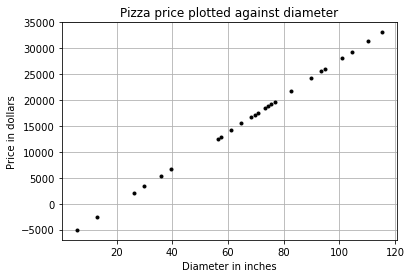

Found [26.242424242424242] [ 2063.10046368]
5.80808080808 115.191919192


In [ ]:
X = np.linspace(1.0, 120.0, 100)
find_root(X)